# Image classification using CNN

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Sports-celebrity images'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/drive/MyDrive/Sports-celebrity images/Ronaldo/ronaldo_(29).jpg
/content/drive/MyDrive/Sports-celebrity images/Ronaldo/ronaldo_(28).jpg
/content/drive/MyDrive/Sports-celebrity images/Ronaldo/ronaldo_(24).jpg
/content/drive/MyDrive/Sports-celebrity images/Ronaldo/ronaldo_(109).jpg
/content/drive/MyDrive/Sports-celebrity images/Ronaldo/ronaldo_(22).jpg
/content/drive/MyDrive/Sports-celebrity images/Ronaldo/ronaldo_(105).jpg
/content/drive/MyDrive/Sports-celebrity images/Ronaldo/ronaldo_(106).jpg
/content/drive/MyDrive/Sports-celebrity images/Ronaldo/ronaldo_(26).jpg
/content/drive/MyDrive/Sports-celebrity images/Ronaldo/ronaldo_(27).jpg
/content/drive/MyDrive/Sports-celebrity images/Ronaldo/ronaldo_(17).jpg
/content/drive/MyDrive/Sports-celebrity images/Ronaldo/ronaldo_(108).jpg
/content/drive/MyDrive/Sports-celebrity images/Ronaldo/ronaldo_(23).jpg
/content/drive/MyDrive/Sports-celebrity images/Ronaldo/ronaldo_(2).jpg
/content/drive/MyDrive/Sports-celebrity images/Ronaldo/ronald

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import PIL
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,losses
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from sklearn.model_selection import train_test_split

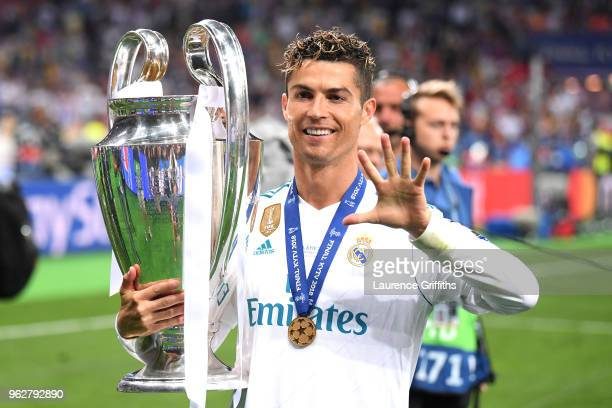

In [ ]:
path=pathlib.Path('/content/drive/MyDrive/Sports-celebrity images')
reptile_images={
    'Kane Williamson':list(path.glob('Kane Williamson/*')),
    'Kobe Bryant':list(path.glob('Kobe Bryant/*')),
    'Maria Sharapova':list(path.glob('Maria Sharapova/*')),
    'Ronaldo':list(path.glob('Ronaldo/*'))

    }
reptile_labels={
    'Kane Williamson':0,'Kobe Bryant':1,'Maria Sharapova':2,
    'Ronaldo':3}
images=reptile_images['Ronaldo'][:5]
PIL.Image.open(images[0])

In [ ]:
X,y=[],[]
for reptile,images in reptile_images.items():
    for image in images:
        img=cv2.imread(str(image))
        img=cv2.resize(img,(300,300))
        X.append(img)
        y.append(reptile_labels[reptile])
X=np.array(X)
y=np.array(y)

In [ ]:
X=X/255

In [ ]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=23)
train_X.shape,test_X.shape

((352, 300, 300, 3), (89, 300, 300, 3))

In [ ]:
data_augmentation=keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal',input_shape=(300,300,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    #layers.experimental.preprocessing.RandomTranslation(0.1,0.1),
])

In [ ]:
num_classes=10
model=keras.models.Sequential()
model.add(data_augmentation)
model.add(Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(
        optimizer='adam',
        loss=losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
        )

model.fit(train_X,train_y,epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


11/11 [==============================] - 9s 75ms/step - loss: 1.8227 - accuracy: 0.2500
Epoch 2/10
11/11 [==============================] - 1s 56ms/step - loss: 1.2751 - accuracy: 0.4261
Epoch 3/10
11/11 [==============================] - 1s 55ms/step - loss: 1.1078 - accuracy: 0.5114
Epoch 4/10
11/11 [==============================] - 1s 55ms/step - loss: 0.9651 - accuracy: 0.5938
Epoch 5/10
11/11 [==============================] - 1s 56ms/step - loss: 0.8814 - accuracy: 0.6222
Epoch 6/10
11/11 [==============================] - 1s 56ms/step - loss: 0.8389 - accuracy: 0.6733
Epoch 7/10
11/11 [==============================] - 1s 56ms/step - loss: 0.7507 - accuracy: 0.7102
Epoch 8/10
11/11 [==============================] - 1s 63ms/step - loss: 0.6911 - accuracy: 0.7159
Epoch 9/10
11/11 [==============================] - 1s 68ms/step - loss: 0.6034 - accuracy: 0.7727
Epoch 10/10
11/11 [==============================] - 1s 64ms/step - loss: 0.6497 - accuracy: 0.7642


In [ ]:
model.evaluate(test_X,test_y)

3/3 [==============================] - 1s 262ms/step - loss: 1.1126 - accuracy: 0.5955


[1.112587809562683, 0.5955055952072144]

Epoch 1/20
11/11 [==============================] - ETA: 0s - loss: 0.6203 - accuracy: 0.7727

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 2s 201ms/step - loss: 0.6203 - accuracy: 0.7727 - val_loss: 1.1763 - val_accuracy: 0.6292
Epoch 2/20
11/11 [==============================] - 2s 150ms/step - loss: 0.6033 - accuracy: 0.7557 - val_loss: 1.0948 - val_accuracy: 0.5843
Epoch 3/20
11/11 [==============================] - 1s 85ms/step - loss: 0.5452 - accuracy: 0.7926 - val_loss: 1.2120 - val_accuracy: 0.5955
Epoch 4/20
11/11 [==============================] - 1s 71ms/step - loss: 0.4813 - accuracy: 0.8239 - val_loss: 1.2490 - val_accuracy: 0.5955
Epoch 5/20
11/11 [==============================] - 1s 122ms/step - loss: 0.4616 - accuracy: 0.8295 - val_loss: 1.0849 - val_accuracy: 0.6292
Epoch 6/20
11/11 [==============================] - 1s 114ms/step - loss: 0.4558 - accuracy: 0.8352 - val_loss: 1.0489 - val_accuracy: 0.6742
Epoch 7/20
11/11 [==============================] - 1s 114ms/step - loss: 0.4373 - accuracy: 0.8324 - val_loss: 0.9740 - val_accuracy: 0.6292
Epoch 8/20
11/11 [=

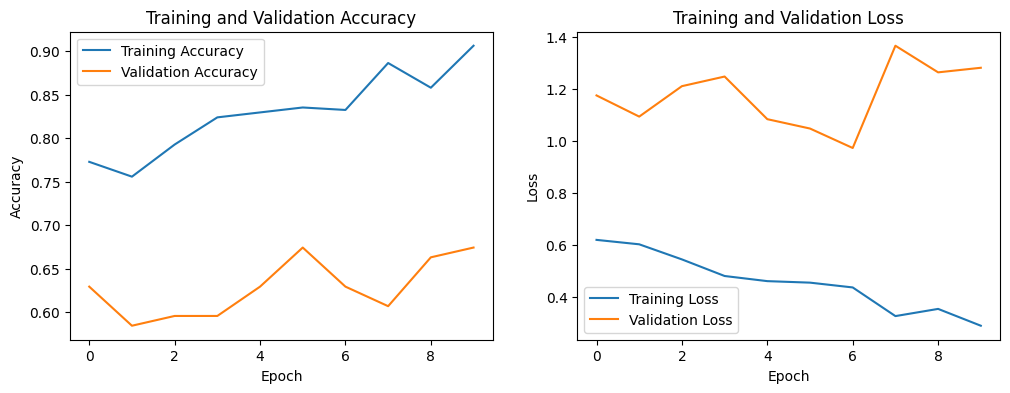

In [ ]:
# Callbacks
checkpoint_cb = keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    train_X, train_y, epochs=20,
    validation_data=(test_X, test_y),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

# Plotting learning curves
def plot_learning_curves(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(test_X, test_y)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Plot learning curves
plot_learning_curves(history)


# using RNN

In [ ]:
import numpy as np
import pandas as pd
import os
import pathlib
import PIL
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, losses
from sklearn.model_selection import train_test_split

In [ ]:
path = pathlib.Path('/content/drive/MyDrive/Sports-celebrity images')
reptile_images = {
    'Kane Williamson': list(path.glob('Kane Williamson/*')),
    'Kobe Bryant': list(path.glob('Kobe Bryant/*')),
    'Maria Sharapova': list(path.glob('Maria Sharapova/*')),
    'Ronaldo': list(path.glob('Ronaldo/*'))
}
reptile_labels = {
    'Kane Williamson': 0, 'Kobe Bryant': 1, 'Maria Sharapova': 2,
    'Ronaldo': 3
}

In [ ]:
X, y = [], []
for reptile, images in reptile_images.items():
    for image in images:
        img = cv2.imread(str(image))
        img = cv2.resize(img, (300, 300))
        X.append(img)
        y.append(reptile_labels[reptile])
X = np.array(X)
y = np.array(y)
X = X / 255

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
train_X = train_X.reshape(train_X.shape[0], 1, 300, 300, 3)
test_X = test_X.reshape(test_X.shape[0], 1, 300, 300, 3)

In [ ]:
model = keras.Sequential([
    layers.Input(shape=(1, 300, 300, 3)),  # Add time dimension
    layers.TimeDistributed(layers.Conv2D(filters=16, kernel_size=3, activation='relu')),
    layers.TimeDistributed(layers.MaxPooling2D(pool_size=2)),
    layers.TimeDistributed(layers.Conv2D(filters=32, kernel_size=3, activation='relu')),
    layers.TimeDistributed(layers.MaxPooling2D(pool_size=2)),
    layers.TimeDistributed(layers.Conv2D(filters=64, kernel_size=3, activation='relu')),
    layers.TimeDistributed(layers.MaxPooling2D(pool_size=2)),
    layers.TimeDistributed(layers.Flatten()),
    layers.LSTM(64),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')  # Adjust number of units for output classes
])

In [ ]:
model.compile(
    optimizer='adam',
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(train_X, train_y, epochs=10, validation_data=(test_X, test_y))

Epoch 1/10
11/11 [==============================] - 8s 199ms/step - loss: 1.4236 - accuracy: 0.2898 - val_loss: 1.3272 - val_accuracy: 0.5281
Epoch 2/10
11/11 [==============================] - 1s 72ms/step - loss: 1.2803 - accuracy: 0.4205 - val_loss: 1.2834 - val_accuracy: 0.4045
Epoch 3/10
11/11 [==============================] - 1s 77ms/step - loss: 1.0859 - accuracy: 0.5369 - val_loss: 0.9817 - val_accuracy: 0.6067
Epoch 4/10
11/11 [==============================] - 1s 71ms/step - loss: 0.7981 - accuracy: 0.7188 - val_loss: 0.9116 - val_accuracy: 0.6292
Epoch 5/10
11/11 [==============================] - 1s 71ms/step - loss: 0.5027 - accuracy: 0.8494 - val_loss: 0.7480 - val_accuracy: 0.7303
Epoch 6/10
11/11 [==============================] - 1s 72ms/step - loss: 0.2066 - accuracy: 0.9574 - val_loss: 0.7461 - val_accuracy: 0.6854
Epoch 7/10
11/11 [==============================] - 1s 77ms/step - loss: 0.0759 - accuracy: 0.9915 - val_loss: 0.7228 - val_accuracy: 0.7303
Epoch 8/10
1

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(test_X, test_y)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

3/3 [==============================] - 0s 33ms/step - loss: 0.8729 - accuracy: 0.6966
Test Loss: 0.8728758692741394
Test Accuracy: 0.6966292262077332


In [ ]:
import matplotlib.pyplot as plt

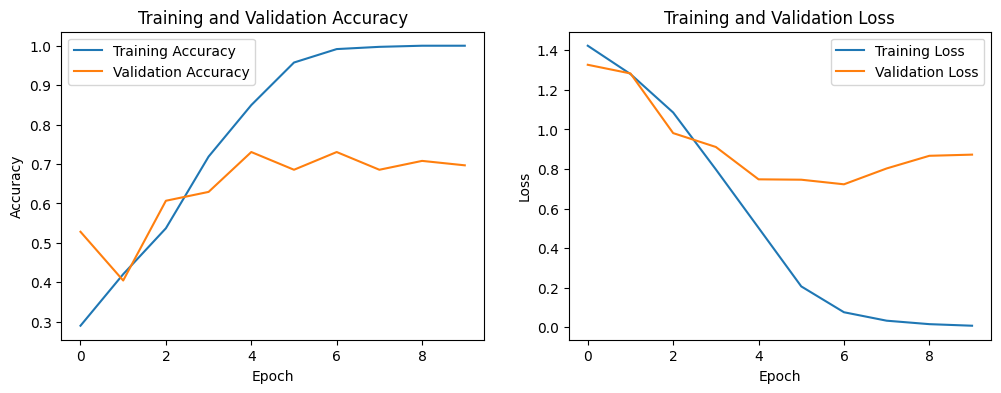

In [ ]:
def plot_learning_curves(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.show()

plot_learning_curves(history)

# using ANN

In [ ]:
import numpy as np
import pandas as pd
import os
import pathlib
import PIL
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, losses
from sklearn.model_selection import train_test_split

In [ ]:
path = pathlib.Path('/content/drive/MyDrive/Sports-celebrity images')
reptile_images = {
    'Kane Williamson': list(path.glob('Kane Williamson/*')),
    'Kobe Bryant': list(path.glob('Kobe Bryant/*')),
    'Maria Sharapova': list(path.glob('Maria Sharapova/*')),
    'Ronaldo': list(path.glob('Ronaldo/*'))
}


In [ ]:
reptile_labels = {
    'Kane Williamson': 0, 'Kobe Bryant': 1, 'Maria Sharapova': 2,
    'Ronaldo': 3
}

In [ ]:
# Load and preprocess images
X, y = [], []
for reptile, images in reptile_images.items():
    for image in images:
        img = cv2.imread(str(image))
        img = cv2.resize(img, (100, 100))  # Resize images to smaller dimensions
        X.append(img)
        y.append(reptile_labels[reptile])
X = np.array(X)
y = np.array(y)
X = X / 255

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Flatten the images
train_X_flatten = train_X.reshape(train_X.shape[0], -1)
test_X_flatten = test_X.reshape(test_X.shape[0], -1)

In [ ]:
model = keras.Sequential([
    layers.Input(shape=(300 * 300 * 3,)),  # Flatten the input images
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')  # Adjust number of units for output classes
])

In [ ]:
model = keras.Sequential([
    layers.Input(shape=(100 * 100 * 3,)),  # Flatten the input images
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Add dropout for regularization
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Add dropout for regularization
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')  # Adjust number of units for output classes
])


In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(
    optimizer=optimizer,
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(test_X_flatten, test_y)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


3/3 [==============================] - 0s 15ms/step - loss: 5.6416 - accuracy: 0.3596
Test Loss: 5.641603469848633
Test Accuracy: 0.3595505654811859


In [ ]:
history = model.fit(train_X_flatten, train_y, epochs=20, validation_data=(test_X_flatten, test_y))

Epoch 1/20
11/11 [==============================] - 2s 27ms/step - loss: 1.8672 - accuracy: 0.2727 - val_loss: 1.4521 - val_accuracy: 0.2809
Epoch 2/20
11/11 [==============================] - 0s 10ms/step - loss: 1.8882 - accuracy: 0.2244 - val_loss: 1.3731 - val_accuracy: 0.2921
Epoch 3/20
11/11 [==============================] - 0s 10ms/step - loss: 1.7410 - accuracy: 0.2443 - val_loss: 1.3980 - val_accuracy: 0.1910
Epoch 4/20
11/11 [==============================] - 0s 9ms/step - loss: 1.4734 - accuracy: 0.2699 - val_loss: 1.3744 - val_accuracy: 0.2697
Epoch 5/20
11/11 [==============================] - 0s 10ms/step - loss: 1.4284 - accuracy: 0.3040 - val_loss: 1.3287 - val_accuracy: 0.3596
Epoch 6/20
11/11 [==============================] - 0s 10ms/step - loss: 1.4209 - accuracy: 0.2898 - val_loss: 1.3543 - val_accuracy: 0.4045
Epoch 7/20
11/11 [==============================] - 0s 10ms/step - loss: 1.4074 - accuracy: 0.2670 - val_loss: 1.3569 - val_accuracy: 0.3933
Epoch 8/20
11/

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(test_X_flatten, test_y)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

3/3 [==============================] - 0s 8ms/step - loss: 1.3324 - accuracy: 0.4494
Test Loss: 1.3323943614959717
Test Accuracy: 0.449438214302063


In [ ]:
import matplotlib.pyplot as plt

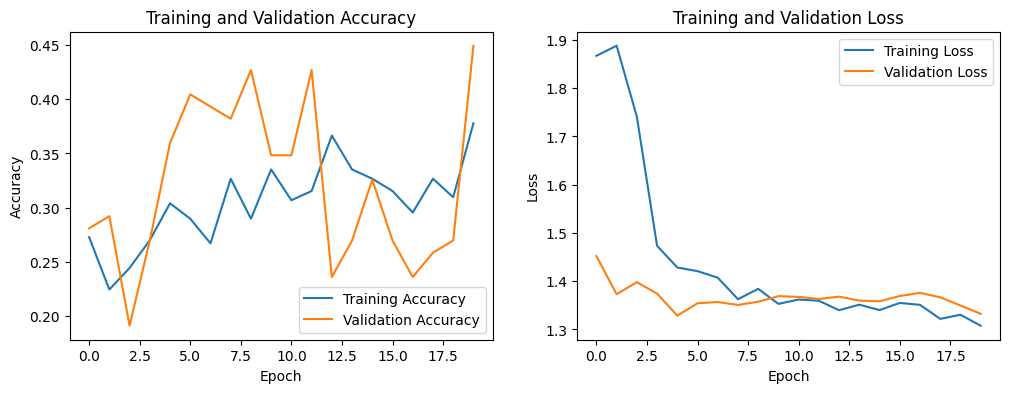

In [ ]:
def plot_learning_curves(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.show()

plot_learning_curves(history)